#Imports necesarios


In [1]:
import cv2  
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw, ImageFont

TAREA: Realiza la cuenta de píxeles blancos por filas (en lugar de por columnas). Determina el valor máximo de píxeles blancos para filas, maxfil, mostrando el número de filas y sus respectivas posiciones, con un número de píxeles blancos mayor o igual que 0.90*maxfil.

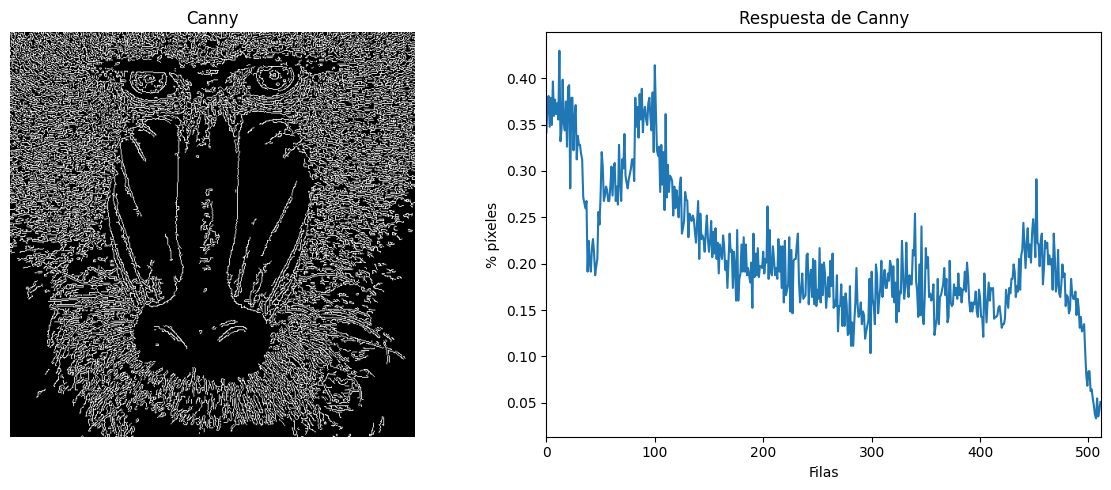

Valor máximo de píxeles blancos en una fila: 220
Filas con >= 90% de maxfil: [  6  12  15  20  21  88 100]


In [2]:
img = cv2.imread('mandril.jpg')
gris = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
canny = cv2.Canny(gris, 100, 200)

row_counts = cv2.reduce(canny, 1, cv2.REDUCE_SUM, dtype=cv2.CV_32SC1)

rows = row_counts[:,0] / (255 * canny.shape[1])


plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.axis("off")
plt.title("Canny")
plt.imshow(canny, cmap='gray') 

plt.subplot(1, 2, 2)
plt.title("Respuesta de Canny")
plt.xlabel("Filas")
plt.ylabel("% píxeles")
plt.plot(rows)

plt.xlim([0, canny.shape[0]])

plt.tight_layout()
plt.show()

maxfil = int(row_counts.max() / 255)
treshold = 0.9 * maxfil 
rows_indices = np.where((row_counts[:,0] / 255 ) >= treshold)[0]
print("Valor máximo de píxeles blancos en una fila:", maxfil)
print("Filas con >= 90% de maxfil:", rows_indices)

TAREA: Aplica umbralizado a la imagen resultante de Sobel (convertida a 8 bits), y posteriormente realiza el conteo por filas y columnas similar al realizado en el ejemplo con la salida de Canny de píxeles no nulos. Calcula el valor máximo de la cuenta por filas y columnas, y determina las filas y columnas por encima del 0.90*máximo. Remarca con alguna primitiva gráfica dichas filas y columnas sobre la imagen del mandril. ¿Cómo se comparan los resultados obtenidos a partir de Sobel y Canny?

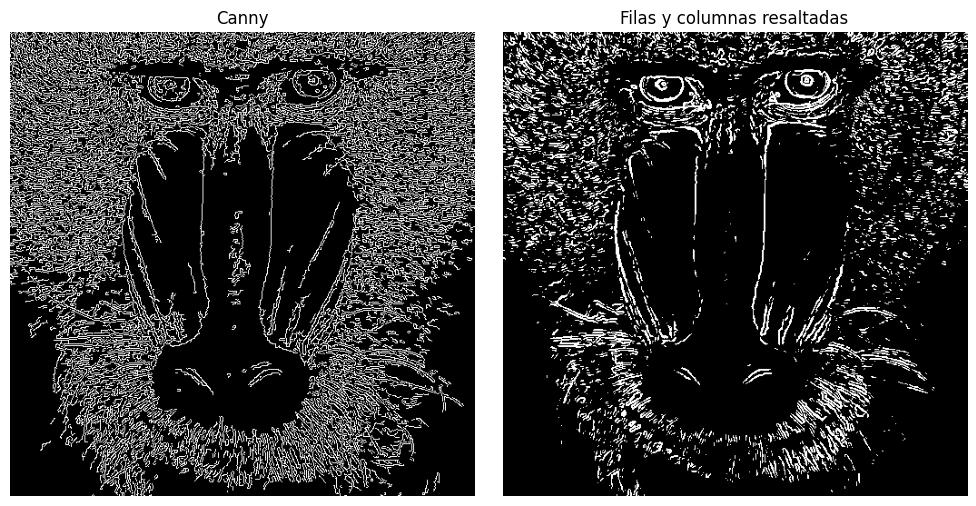

In [3]:

valorUmbral = 130 

ggris = cv2.GaussianBlur(gris, (3, 3), 0)

sobelx = cv2.Sobel(ggris, cv2.CV_64F, 1, 0)
sobely = cv2.Sobel(ggris, cv2.CV_64F, 0, 1)
sobel = np.sqrt(sobelx**2 + sobely**2)
sobel_8u = cv2.convertScaleAbs(sobel)

_, imagenUmbralizada = cv2.threshold(sobel_8u, valorUmbral, 255, cv2.THRESH_BINARY)

# Canny
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.axis("off")
plt.title("Canny")
plt.imshow(canny, cmap='gray')
plt.subplot(1, 2, 2)
plt.axis("off")
plt.title("Filas y columnas resaltadas")
plt.imshow(imagenUmbralizada, cmap='gray')
plt.tight_layout()
plt.show()

Valor máximo de píxeles blancos en una fila: 170
Filas con >= 90% de maxfil: [ 2  3  4  5  6  8 20 24 81 82 83 84 85]
Valor máximo de píxeles blancos en una columna: 152
Columnas con >= 90% de maxcol: [104 127 288]


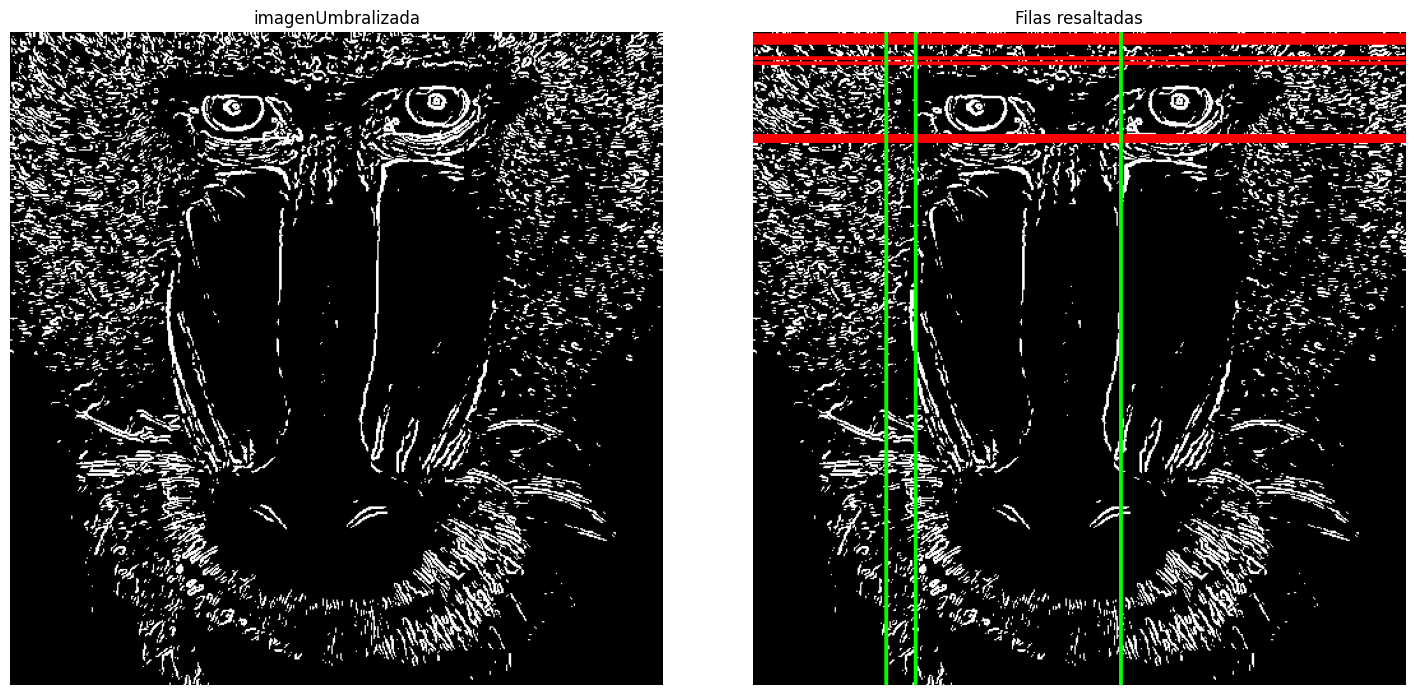

In [4]:
row_counts = cv2.reduce(imagenUmbralizada, 1, cv2.REDUCE_SUM, dtype=cv2.CV_32SC1)
rows = row_counts[:,0] / (255 * imagenUmbralizada.shape[1])
maxfil = int(row_counts.max() / 255)
treshold = 0.9 * maxfil 
rows_indices = np.where((row_counts[:,0] / 255 ) >= treshold)[0]
print("Valor máximo de píxeles blancos en una fila:", maxfil)
print("Filas con >= 90% de maxfil:", rows_indices)

cols_counts = cv2.reduce(imagenUmbralizada, 0, cv2.REDUCE_SUM, dtype=cv2.CV_32SC1)
cols = cols_counts[0,:] / (255 * imagenUmbralizada.shape[0])
maxcol = int(cols_counts.max() / 255)
treshold = 0.9 * maxcol 
cols_indices = np.where((cols_counts[0,:] / 255 ) >= treshold)[0]
print("Valor máximo de píxeles blancos en una columna:", maxcol)
print("Columnas con >= 90% de maxcol:", cols_indices)

imagen_resaltada = cv2.cvtColor(imagenUmbralizada.copy(), cv2.COLOR_GRAY2BGR)  
for fila in rows_indices:
    cv2.line(imagen_resaltada, (0, fila), (imagen_resaltada.shape[1], fila), (255,0,0), 2)
for col in cols_indices:
    cv2.line(imagen_resaltada, (col, 0), (col, imagen_resaltada.shape[0]), (0,255,0), 2)


# Sobel umbralizado
plt.figure(figsize=(15, 7))
plt.subplot(1, 2, 1)
plt.axis("off")
plt.title("imagenUmbralizada")
plt.imshow(imagenUmbralizada, cmap='gray') 

plt.subplot(1, 2, 2)
plt.axis("off")
plt.title("Filas resaltadas")
plt.imshow(imagen_resaltada)
plt.tight_layout()
plt.show()



TAREA: Proponer un demostrador que capture las imágenes de la cámara, y les permita exhibir lo aprendido en estas dos prácticas ante quienes no cursen la asignatura :). Es por ello que además de poder mostrar la imagen original de la webcam, permita cambiar de modo, incluyendo al menos dos procesamientos diferentes como resultado de aplicar las funciones de OpenCV trabajadas hasta ahora.


In [5]:

vid = cv2.VideoCapture(0)

w = int(vid.get(cv2.CAP_PROP_FRAME_WIDTH) // 2)
h = int(vid.get(cv2.CAP_PROP_FRAME_HEIGHT) // 2)
vid.set(cv2.CAP_PROP_FRAME_WIDTH, w)
vid.set(cv2.CAP_PROP_FRAME_HEIGHT, h)


modo = 0   
valorUmbral = 130


def cambiar_modo(event, x, y, flags, param):
    global modo
    if event == cv2.EVENT_LBUTTONDOWN:
        modo = (modo + 1) % 4  


cv2.namedWindow("Cam")
cv2.setMouseCallback("Cam", cambiar_modo)

while True:
    ret, frameIN = vid.read()
    if not ret:
        break


    frame = cv2.resize(frameIN, (w, h), cv2.INTER_NEAREST)

    if modo == 0:

        cv2.imshow("Cam", frame)

    elif modo == 1:

        collage = np.zeros((h*2, w*2, 3), dtype=np.uint8)

        tl = collage[0:h, 0:w]        
        tr = collage[0:h, w:w+w]     
        bl = collage[h:h+h, 0:w]      
        br = collage[h:h+h, w:w+w]  

        r = frame[:, :, 2]
        g = frame[:, :, 1]
        b = frame[:, :, 0]

       
        tl[:, :, 0] = b
        tl[:, :, 1] = g
        tl[:, :, 2] = r

        
        tr[:, :, 0] = 255 - r
        tr[:, :, 1] = 96 - g
        tr[:, :, 2] = 55 + b

       
        mosaic_triangles = np.zeros_like(frame)
        block = 8
        for y in range(0, frame.shape[0], block):
            for x in range(0, frame.shape[1], block):
                x2, y2 = x + block, y + block
                color = frame[y:y+block, x:x+block].mean(axis=(0, 1)).tolist()
                pts = np.array([[x, y], [x2, y], [(x+x2)//2, y2]], np.int32)
                cv2.fillPoly(mosaic_triangles, [pts], color)
        bl[:, :, :] = mosaic_triangles

        
        br[:, :, 0] = 255 - b
        br[:, :, 1] = 159 + g
        br[:, :, 2] = 255 + r

        cv2.imshow("Cam", collage)

    elif modo == 2:
        
        gris = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        # Umbral binario
        _, binaria = cv2.threshold(gris, valorUmbral, 255, cv2.THRESH_BINARY)

        # Umbral inverso
        _, binaria_inv = cv2.threshold(gris, valorUmbral, 255, cv2.THRESH_BINARY_INV)

        # Rango de valores
        rango = cv2.inRange(gris, 150, 200)

        # Collage 2x2 en escala de grises
        umbral_collage = np.zeros((h*2, w*2), dtype=np.uint8)
        umbral_collage[0:h, 0:w] = gris
        umbral_collage[0:h, w:w+w] = binaria
        umbral_collage[h:h+h, 0:w] = binaria_inv
        umbral_collage[h:h+h, w:w+w] = rango

        cv2.imshow("Cam", umbral_collage)

    elif modo == 3:
        
        gris = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        canny = cv2.Canny(gris, 100, 200)
        cv2.imshow("Cam", canny)

    if cv2.waitKey(20) == 27:
        break

vid.release()
cv2.destroyAllWindows()


TAREA: Tras ver los vídeos [My little piece of privacy](https://www.niklasroy.com/project/88/my-little-piece-of-privacy), [Messa di voce](https://youtu.be/GfoqiyB1ndE?feature=shared) y [Virtual air guitar](https://youtu.be/FIAmyoEpV5c?feature=shared) proponer un demostrador reinterpretando la parte de procesamiento de la imagen, tomando como punto de partida alguna de dichas instalaciones.

In [6]:
diana = cv2.imread("diana.png")
if diana is None:
    raise FileNotFoundError("No se encontró diana.png")


vid = cv2.VideoCapture(0)
w = int(vid.get(cv2.CAP_PROP_FRAME_WIDTH) // 2)
h = int(vid.get(cv2.CAP_PROP_FRAME_HEIGHT) // 2)
vid.set(cv2.CAP_PROP_FRAME_WIDTH, w)
vid.set(cv2.CAP_PROP_FRAME_HEIGHT, h)
diana = cv2.resize(diana, (w, h))

# Inicializar sustractor MOG2
eliminadorFondo = cv2.createBackgroundSubtractorMOG2(history=100, varThreshold=50, detectShadows=True)


punto_guardado = None
disparos = []

while True:
    ret, frame = vid.read()
    if not ret:
        break

   
    frame = cv2.flip(frame, 1)
    frame = cv2.resize(frame, (w, h))

 
    mask = eliminadorFondo.apply(frame)
    background = eliminadorFondo.getBackgroundImage()

    
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5,5))
    mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
    mask = cv2.dilate(mask, kernel, iterations=1)

    
    contornos, _ = cv2.findContours(mask.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    centro = None
    if contornos:
       
        c = max(contornos, key=cv2.contourArea)
        if cv2.contourArea(c) > 500:  
            M = cv2.moments(c)
            if M["m00"] != 0:
                cx = int(M["m10"] / M["m00"])
                cy = int(M["m01"] / M["m00"])  
                centro = (cx, cy)
                cv2.circle(frame, centro, 5, (0,255,0), -1)

    
    diana_mostrar = diana.copy()
    for shot in disparos:
        cv2.circle(diana_mostrar, shot, 10, (0,0,255), -1)
    if punto_guardado is not None:
        cv2.circle(diana_mostrar, punto_guardado, 8, (0,255,255), 2)

    collage = np.hstack((diana_mostrar, frame))
    cv2.imshow("Diana + Camara", collage)

    key = cv2.waitKey(30) & 0xFF
    if key == 27:  
        break
    elif key == 32:  
        if centro is not None:
            punto_guardado = centro
    elif key in (13,10):  
        if punto_guardado is not None:
            disparos.append(punto_guardado)
            punto_guardado = None

vid.release()
cv2.destroyAllWindows()
